# Results 

This notebook presents the results obtained in the preparation of the GHZ state with 3 and 5 qubits.


## 3 qubit GHZ preparation

In the following we present the results obtained in the preparation of the GHZ state with 3 qubits. The results reported here were obtained by performing the respective hyperparameter optimisation of each model.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import json
import sys
sys.path.insert(1, '../results/')

In [2]:

#SPSA
with open('../results/qoc/results_3ghz_spsa.json', 'r') as f:
    results_spsa = json.load(f)
#BO Observables
with open('../results/qoc/results_3ghz_bo_observables.json', 'r') as f:
    results_bo_observables = json.load(f)
#BO Statevector
with open('../results/qoc/results_3ghz_bo_statevector.json', 'r') as f:
    results_bo_statevector = json.load(f)

#RL PPO
with open('../results/qoc/results_3ghz_ppo.json', 'r') as f:
    results_ppo = json.load(f)

#RL TD3
with open('../results/qoc/results_3ghz_td3.json', 'r') as f:
    results_td3 = json.load(f)


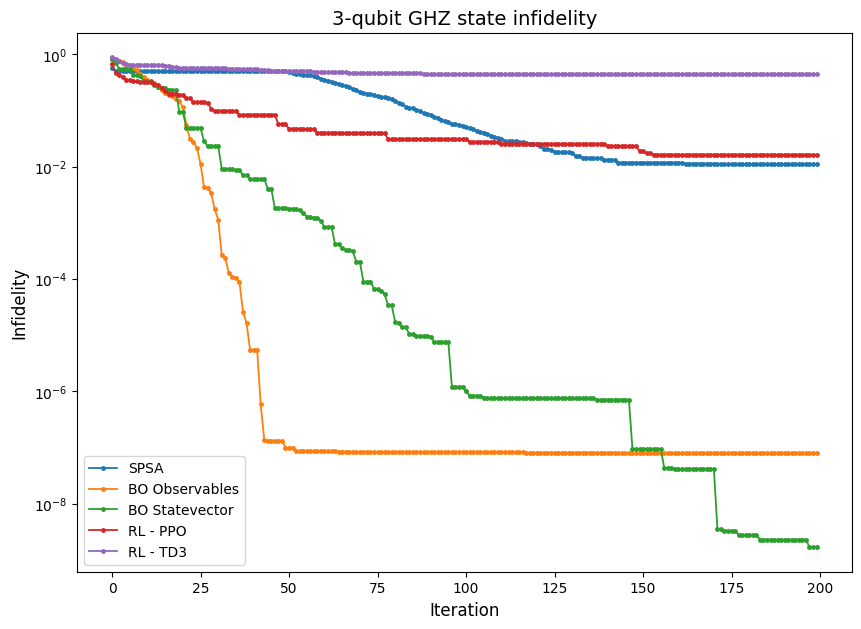

In [3]:
fig, ax = plt.subplots(figsize=(10, 7))

n_samples = np.arange(len(results_spsa['history_best_fidelity_runs'][0]))
ax.plot(n_samples, 1-np.mean(np.array(results_spsa['history_best_fidelity_runs']),0),'-o', label='SPSA', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_bo_observables['history_best_fidelity_runs']),0),'-o', label='BO Observables', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_bo_statevector['history_best_fidelity_runs']),0),'-o', label='BO Statevector', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_ppo['history_best_fidelity_runs']),0),'-o', label='RL - PPO', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_td3['history_best_fidelity_runs']),0),'-o', label='RL - TD3', linewidth=1.3, markersize=2.5,)


plt.ylabel('Infidelity', size=12)
plt.xlabel('Iteration', size=12)
plt.yscale('log')
plt.legend(loc=3)
plt.title('3-qubit GHZ state infidelity', size=14)
plt.show()



### Results Analysis: 

In the figure above, we observe that models based on Bayesian optimisation generally yield the best results. These models achieve remarkably low infidelities, reaching values less than or equal to $10^{-7}$. The convergence of these models is particularly noteworthy, as they produce excellent results within just a few iterations.

In contrast, the remaining models initially demonstrate higher infidelity values. However, it's important to note that increasing the number of iterations can significantly improve their performance. In particular, Reinforcement Learning models have the potential to achieve very low infidelity values with extended training.

While increasing the number of iterations can enhance performance across all models, it's crucial to consider the computational trade-offs:

- For most models, additional iterations generally lead to improved results without significant computational overhead.
- However, Bayesian Optimisation methods face a notable challenge: as the number of iterations increases, the algorithm's complexity grows cubically. This is primarily due to the use of Gaussian Processes as the surrogate model.


# Results 5 qubit GHZ preparation
### Challenges in Preparing 5-Qubit GHZ States:

Preparing a 5-qubit GHZ state is significantly more complex than a 3-qubit version due to:

-   Larger circuit size
-   More parameters to optimise
-   Increased accumulated gate errors
-   Greater susceptibility to decoherence

In [4]:
#SPSA
with open('../results/qoc/results_5ghz_spsa.json', 'r') as f:
    results_spsa = json.load(f)
    
#BO Observables
with open('../results/qoc/results_5ghz_bo_observables.json', 'r') as f:
    results_bo_observables = json.load(f)

#BO Statevector
with open('../results/qoc/results_5ghz_bo_statevector.json', 'r') as f:
    results_bo_statevector = json.load(f)

#RL PPO
with open('../results/qoc/results_5ghz_ppo.json', 'r') as f:
    results_ppo = json.load(f)

#RL TD3
with open('../results/qoc/results_5ghz_td3.json', 'r') as f:
    results_td3 = json.load(f)


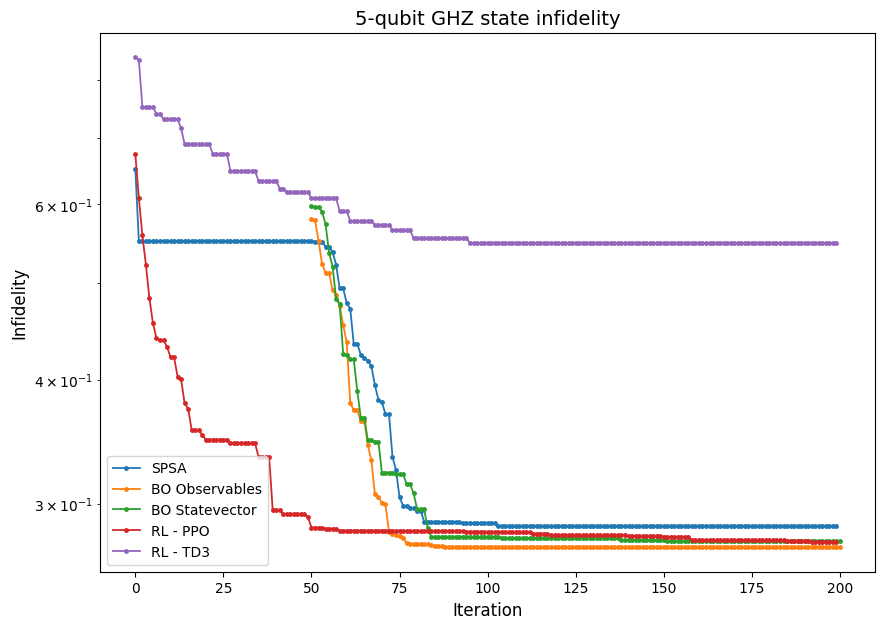

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

n_samples = np.arange(len(results_spsa['history_best_fidelity_runs'][0]))
ax.plot(n_samples, 1-np.mean(np.array(results_spsa['history_best_fidelity_runs']),0),'-o', label='SPSA', linewidth=1.3, markersize=2.5,)
ax.plot(np.arange(results_bo_observables['n_initial_samples'],results_bo_observables['size_dataset']+1),
            1-np.mean(np.array(results_bo_observables['history_best_fidelity_runs']),0),'-o', label='BO Observables', linewidth=1.3, markersize=2.5,)

ax.plot(np.arange(results_bo_statevector['n_initial_samples'],results_bo_statevector['size_dataset']+1),
             1-np.mean(np.array(results_bo_statevector['history_best_fidelity_runs']),0),'-o', label='BO Statevector', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_ppo['history_best_fidelity_runs']),0),'-o', label='RL - PPO', linewidth=1.3, markersize=2.5,)
ax.plot(n_samples, 1-np.mean(np.array(results_td3['history_best_fidelity_runs']),0),'-o', label='RL - TD3', linewidth=1.3, markersize=2.5,)


plt.ylabel('Infidelity', size=12)
plt.xlabel('Iteration', size=12)
plt.yscale('log')
plt.legend(loc=3)
plt.title('5-qubit GHZ state infidelity', size=14)
plt.show()



### Results Analysis: 
With 200 circuit configurations, all models show a considerable increase in infidelity compared to the 3-qubit GHZ state. Key observations:

-    No model achieved infidelities lower than $10^{-2}$
-    Bayesian Optimisation performed better with greater a priori knowledge (50 initial configurations)
-    Proximal Policy Optimisation outperformed TD3

### Computational Considerations:

-   Bayesian optimisation with observable surrogate models increases the computational cost considerably with increasing number of qubits
-   Achieving good results requires more iterations, which is computationally demanding

These challenges highlight the increasing complexity in quantum state preparation as the number of qubits grows.